Team ID : PNT2022TMID31020 

In [13]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='rdgbg3kMCGi88SJkCEQy_NnDL5SM6HdBGISZhUzseyty',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.eu.cloud-object-storage.appdomain.cloud')

bucket = 'nutritionanalyzer-donotdelete-pr-jvvtcnjydrekes'
object_key = 'TEST_SET-20221031T142419Z-001.zip'

streaming_body_1 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [14]:
from io import BytesIO
import zipfile
unzip = zipfile.ZipFile(BytesIO(streaming_body_1.read()),'r')
file_paths = unzip.namelist()
for path in file_paths :
    unzip.extract(path)

In [19]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='rdgbg3kMCGi88SJkCEQy_NnDL5SM6HdBGISZhUzseyty',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.eu.cloud-object-storage.appdomain.cloud')

bucket = 'nutritionanalyzer-donotdelete-pr-jvvtcnjydrekes'
object_key = 'TRAIN_SET.zip'

streaming_body_2 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [20]:
from io import BytesIO
import zipfile
unzip = zipfile.ZipFile(BytesIO(streaming_body_2.read()),'r')
file_paths = unzip.namelist()
for path in file_paths :
    unzip.extract(path)

In [21]:
ls

TEST_SET/  TRAIN_SET/


**Data Collection**

**DATA PREPROCESSING**

In [22]:
# Importing the ImageDataGenerator library
from keras.preprocessing.image import ImageDataGenerator

In [23]:
# Configure ImageDatagenerator class
train_datagen = ImageDataGenerator(rescale = 1./255, horizontal_flip = True, shear_range = 0.2, zoom_range = 0.2) #for train data

In [24]:
test_datagen = ImageDataGenerator(rescale = 1./255) # for test data 

In [25]:
# Applying ImageDataGenerator functionality to Testset
x_train = train_datagen.flow_from_directory(r"TRAIN_SET", target_size =(64,64), class_mode = "sparse", batch_size = 5, color_mode = 'rgb')

Found 2626 images belonging to 5 classes.


In [26]:
# Applying ImageDataGenerator functionality to Trainset
x_test = test_datagen.flow_from_directory(r"TEST_SET", target_size = (64,64), class_mode = "sparse", batch_size = 5,color_mode='rgb')

Found 1055 images belonging to 5 classes.


In [27]:
print(x_train.class_indices)

{'APPLES': 0, 'BANANA': 1, 'ORANGE': 2, 'PINEAPPLE': 3, 'WATERMELON': 4}


In [28]:
print(x_test.class_indices)

{'APPLES': 0, 'BANANA': 1, 'ORANGE': 2, 'PINEAPPLE': 3, 'WATERMELON': 4}


In [29]:
from collections import Counter as c
c(x_train.labels) 

Counter({0: 606, 1: 445, 2: 479, 3: 621, 4: 475})

**MODEL BUILDING**

Importing model building libraries

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D,Flatten, Dense

In [31]:
model = Sequential()

Initializing the model

In [32]:
classifier = Sequential ()

Adding  CNN layers

In [33]:
# Adding  Convolutional layer
classifier.add(Convolution2D(32,(3,3),activation = "relu", input_shape  = (64,64,3)))

In [34]:
classifier.add(MaxPooling2D(pool_size=(2,2))) #adding pooling layer

In [35]:
classifier.add(Convolution2D(32,(3,3),activation = "relu"))

In [36]:
classifier.add(MaxPooling2D(pool_size=(2,2)))

In [37]:
classifier.add(Flatten()) #adding flatten layer

Adding Dense layers

In [38]:
classifier.add(Dense(units = 128,activation='relu')) #adding dense layer
#classifier.add(Dense(300,activation='relu')) #adding dense layer 2, we can add any no.of hiddden layers, here it is 2
classifier.add(Dense(units =5, activation ='softmax')) #adding output layer to the model

In [39]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)              

Configuring the learning process

In [40]:
classifier.compile(loss = "sparse_categorical_crossentropy", metrics = ["accuracy"], optimizer = 'adam') #compiling the model

Training the model


In [41]:
classifier.fit_generator(generator=x_train,steps_per_epoch = len(x_train),epochs=20, validation_data=x_test,validation_steps = len(x_test))

/tmp/wsuser/ipykernel_217/4293874847.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  classifier.fit_generator(generator=x_train,steps_per_epoch = len(x_train),epochs=20, validation_data=x_test,validation_steps = len(x_test))


Epoch 1/20
526/526 [==============================] - 29s 54ms/step - loss: 0.1825 - accuracy: 0.9246 - val_loss: 0.0568 - val_accuracy: 0.9716
Epoch 2/20
526/526 [==============================] - 28s 54ms/step - loss: 0.0249 - accuracy: 0.9947 - val_loss: 0.0207 - val_accuracy: 1.0000
Epoch 3/20
526/526 [==============================] - 28s 53ms/step - loss: 0.0016 - accuracy: 0.9996 - val_loss: 0.0136 - val_accuracy: 0.9934
Epoch 4/20
526/526 [==============================] - 28s 53ms/step - loss: 0.0338 - accuracy: 0.9924 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 5/20
526/526 [==============================] - 28s 53ms/step - loss: 0.0124 - accuracy: 0.9970 - val_loss: 0.0029 - val_accuracy: 1.0000
Epoch 6/20
526/526 [==============================] - 28s 53ms/step - loss: 5.4818e-05 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 7/20
526/526 [==============================] - 28s 54ms/step - loss: 2.8845e-05 - accuracy: 1.0000 - val_loss: 0.0015 - val_a

Saving the model

In [51]:
classifier.save("Nutrition_Analyzer.h5")

In [52]:
#compressing the model
!tar -zcvf fruit-classification-model.tgz Nutrition_Analyzer.h5

Nutrition_Analyzer.h5


IBM deployment

In [53]:
!pip install ibm_watson_machine_learning

In [54]:
from ibm_watson_machine_learning import APIClient

In [56]:
wml_credentials = {
    "url" : "https://eu-de.ml.cloud.ibm.com",
    "apikey" : "4UxCxG9LRPgLczZbVHvFNjNu9J1oi4eR8OlqJXOFT79c" #api key of our ibm account
}

In [58]:
client = APIClient(wml_credentials)
client  #connected with our ibm cloud account

In [59]:
client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  -----  ------------------------
ID                                    NAME   CREATED
93d7c522-bdf9-401b-9ec1-d9a602267e26  fruit  2022-11-13T10:26:01.021Z
------------------------------------  -----  ------------------------


In [60]:
space_id = "93d7c522-bdf9-401b-9ec1-d9a602267e26" #accessing a particular space using id

In [61]:
client.set.default_space(space_id) #set as default space for model deployement

'SUCCESS'

In [62]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [67]:
software_space_uid = client.software_specifications.get_id_by_name("tensorflow_rt22.1-py3.9")

In [68]:
software_space_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [ ]:
model_details = client.repository.store_model(model='fruit-classification-model.tgz',meta_props={
    client.repository.ModelMetaNames.NAME:"Nutrition Analyzer model",
})

Testing the model

In [36]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
model = load_model("Nutrition Analyzer.h5") #loading the model

In [37]:
from tensorflow.keras.utils import img_to_array
img = image.load_img(r'/content/drive/MyDrive/Dataset/Fruit dataset/TEST_SET/APPLES/151_100.jpg', grayscale = False, target_size =(64,64)) #loading the image
x = img_to_array(img) #image to array
x = np.expand_dims(x,axis = 0)
predict_x=model.predict(x) 
classes_x=np.argmax(predict_x,axis=-1)
classes_x


1/1 [==============================] - 0s 108ms/step


array([0])

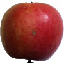

In [38]:
img #display the loaded image

In [39]:
index=['APPLES', 'BANANA', 'ORANGE','PINEAPPLE','WATERMELON']
result=str(index[classes_x[0]])
result


'APPLES'